# DELGT-01 Well Logs 

In [45]:
from sys import stdout
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   
#matplotlib ipympl
import imageio.v3 as iio


In [46]:
#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

In [47]:
# Reading LAS files (.las version 2)
bhp = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_BHP.las'))
cbl = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_CBL.las'))
mrex_cbw = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_mrex_cbw.las'))
mrex_pplo = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_mrex_pplo.las'))
sl = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_SL.las'))
uxpl_gxpl = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_UXPL_GXPL.las'))
xmac_hdil = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_XMAC_HDIL.las'))
zdl_cn = lasio.read(os.path.join('../data/raw/delgt01/las_raw/delgt01_ZDL_CN.las'))

In [48]:
# Reading the .csv file containing core depths  

cores = pd.read_csv('../data/raw/delgt01/core_depths/delgt01_core_depths.csv')
cores.head(10)

,Core Number,Top Depth,Bottom Depth,Length
0,C1,2511.5,2526.90,15.40
1,C2,2576.0,2591.09,15.09
2,C3,2594.5,2597.01,2.51
3,C4,2597.5,2609.82,12.32
4,C5,2610.5,2617.82,7.32
5,C6,2618.0,2641.94,23.94
6,C7,2642.0,2651.00,9.00


In [49]:
# (x1, x2), (bottom, top), 'color'
core_segments = [
     (0, 0), (cores['Bottom Depth'][0], cores['Top Depth'][0]), 'cyan',
     (0, 0), (cores['Bottom Depth'][1], cores['Top Depth'][1]), 'purple', 
     (0, 0), (cores['Bottom Depth'][2], cores['Top Depth'][2]), 'green',
     (0, 0), (cores['Bottom Depth'][3], cores['Top Depth'][3]), 'red',
     (0, 0), (cores['Bottom Depth'][4], cores['Top Depth'][4]), 'orange',
     (0, 0), (cores['Bottom Depth'][5], cores['Top Depth'][5]), 'magenta',
     (0, 0), (cores['Bottom Depth'][6], cores['Top Depth'][6]), 'blue']

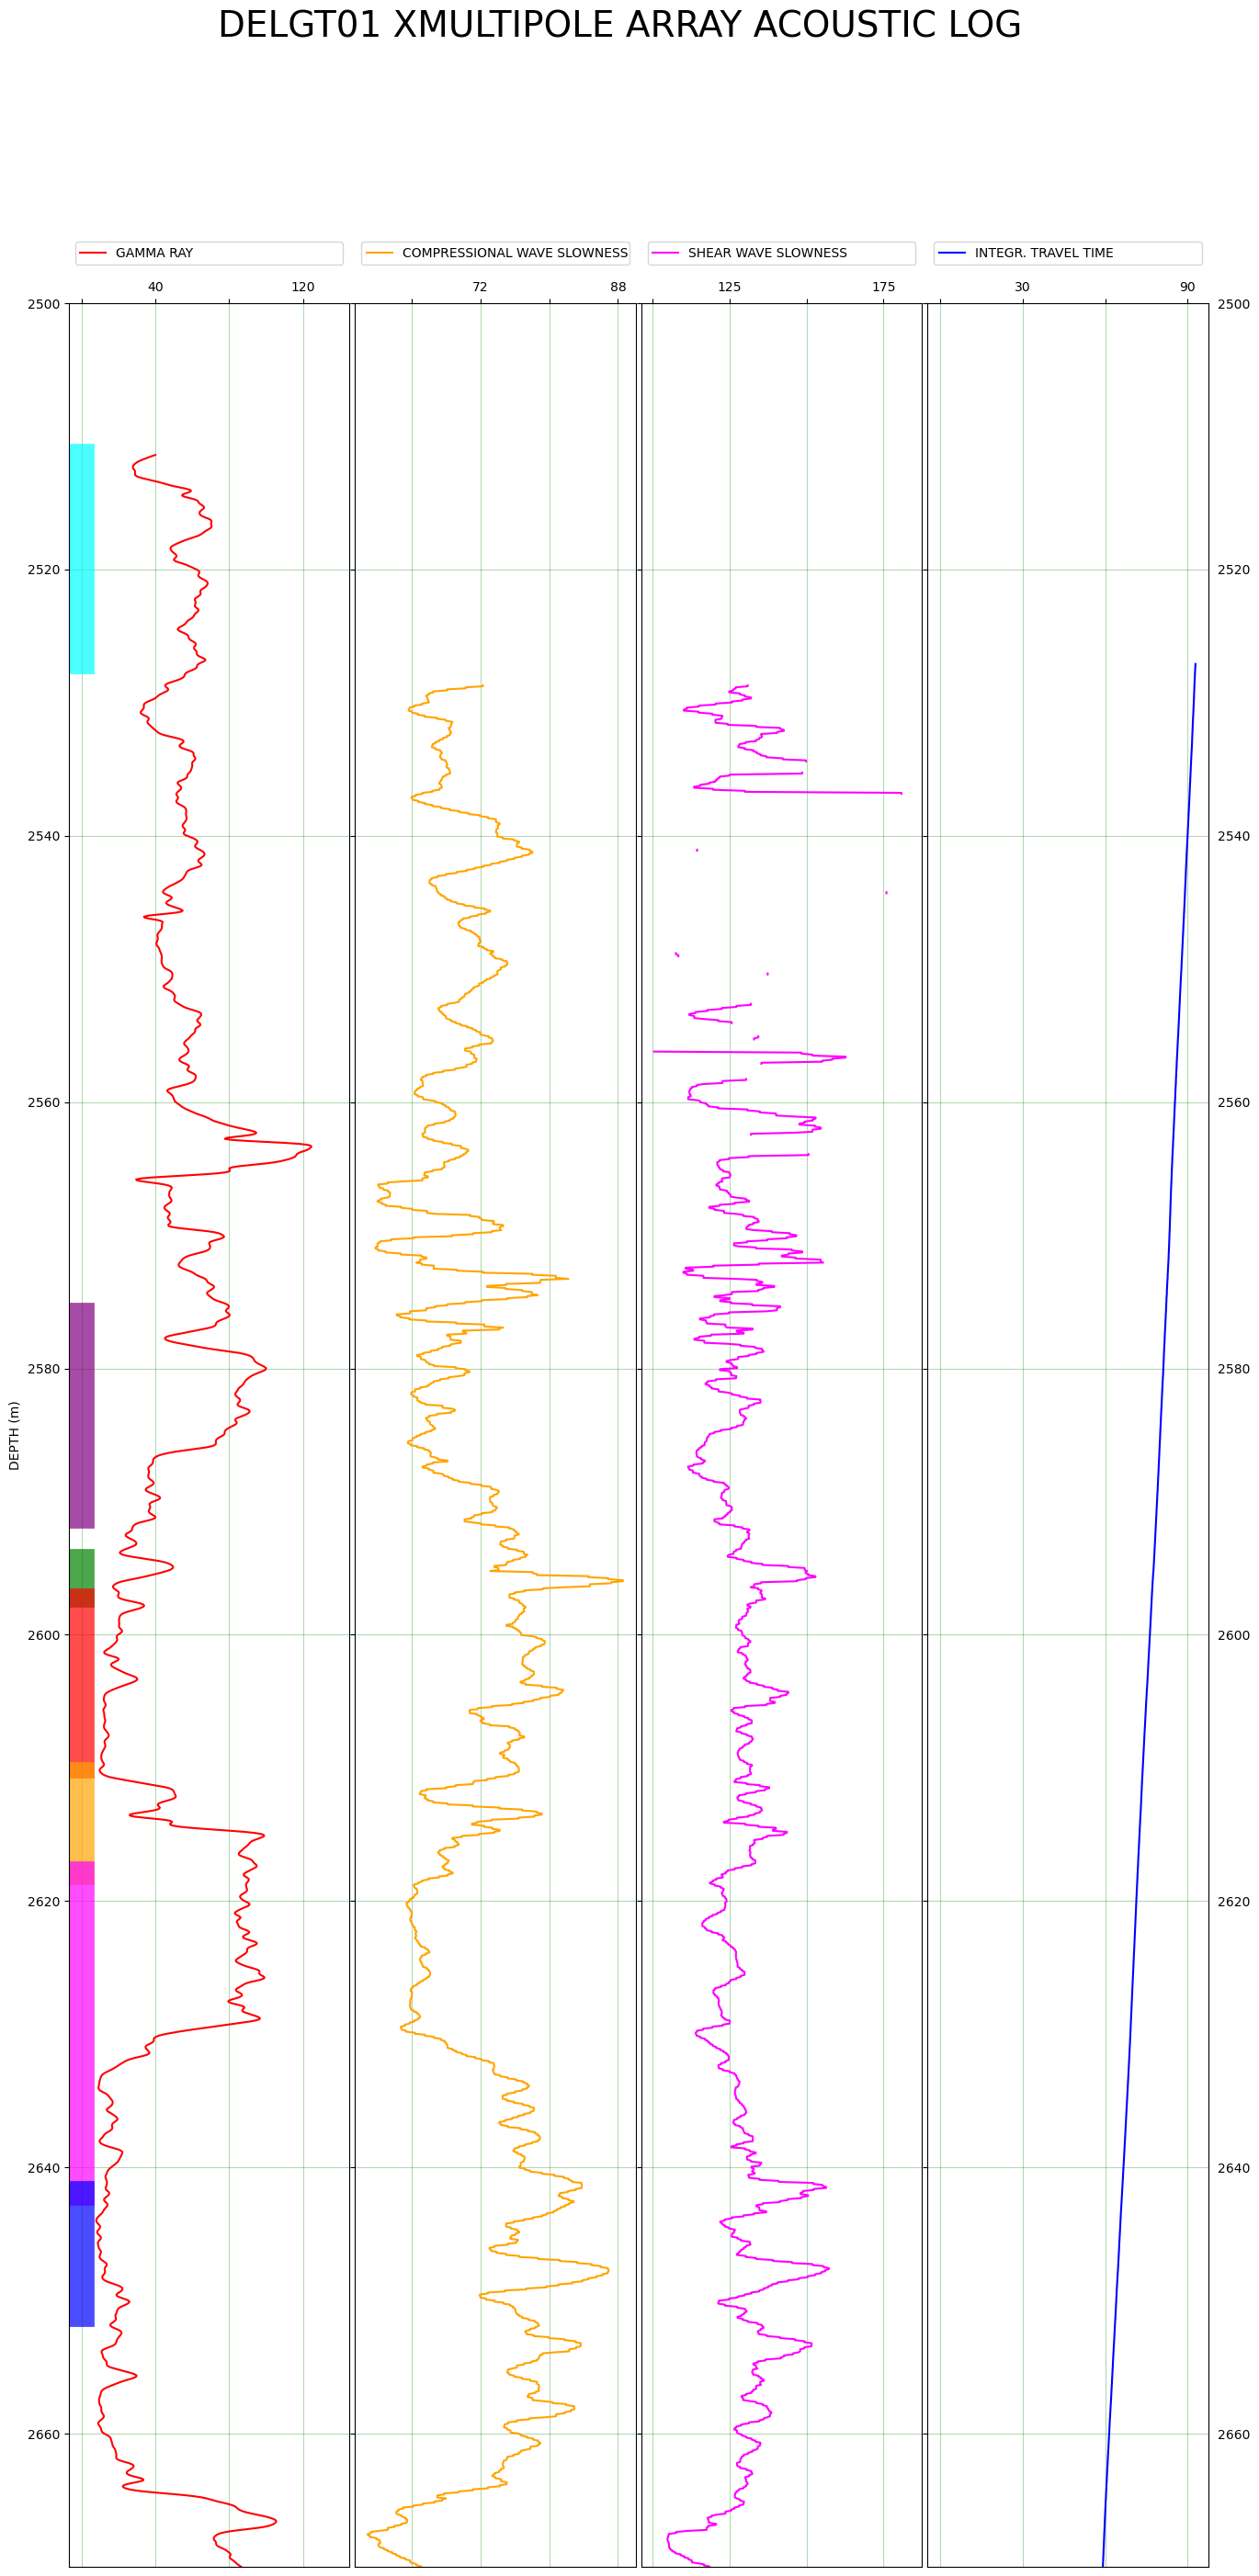

In [50]:
# XMULTIPOLE ARRAY ACOUSTIC LOG

f5, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,32))
f5.subplots_adjust(wspace=0.02)
axs = plt.gca()
axs.invert_yaxis()
f5.suptitle('DELGT01 XMULTIPOLE ARRAY ACOUSTIC LOG', fontsize=28)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 10

ax1.plot(*core_segments, linewidth=20,alpha=0.7) #cores
ax1.plot(xmac_hdil['GR'], xmac_hdil['DEPT'],'r', label='GAMMA RAY')
ax1.xaxis.tick_top()
ax1.set_ylabel('DEPTH (m)')
ax1.set_ylim(2670,2500)
ax1.grid(True, c="g", alpha=0.3)
ax1.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

ax2.plot(xmac_hdil['DTCQI'], xmac_hdil['DEPT'],'orange', label='COMPRESSIONAL WAVE SLOWNESS')
ax2.xaxis.tick_top()
ax2.grid(True, c="g", alpha=0.3)
ax2.set_ylim(2670,2500)
ax2.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  # remove last value of x-ticks, see function defined in first cell

ax3.plot(xmac_hdil['DTSQI'], xmac_hdil['DEPT'],'magenta', label='SHEAR WAVE SLOWNESS')
ax3.xaxis.tick_top()
ax3.grid(True, c="g", alpha=0.3)
ax3.set_ylim(2670,2500)
ax3.legend(bbox_to_anchor=(0.,1,1.,0.03), mode="expand")
plt.setp(ax3.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax3)  # remove last value of x-ticks, see function defined in first cell

ax4.plot(xmac_hdil['TTQI'], xmac_hdil['DEPT'],'blue', label='INTEGR. TRAVEL TIME')
ax4.xaxis.tick_top()
ax4.grid(True, c="g", alpha=0.3)
ax4.set_ylim(2670,2500)
ax4.legend(bbox_to_anchor=(0.,1.,1.,0.03), mode="expand")
plt.setp(ax4.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax4)  # remove last value of x-ticks, see function defined in first cell
plt.show()

#f5.savefig('delgt01-XMAC-cores.png', bbox_inches='tight', dpi=400)

In [51]:
## Loading few images
#im1=imageio.imread(image01.dcm)
#im2=imageio.imread(image02.dcm)
#print(im1.shape)
#vol=np.stack([im1, im2])
#print(vol.shape)

In [53]:
#Loading volumes directly
#import os, sys
ct_path = '../data/raw/delgt01/ct_raw/DELGT01-C1-raw/DELGT01-C1-1/'
ct_dir = os.listdir(ct_path)

for file in ct_dir:
    print(file)


DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0001.2023.08.11.11.48.42.222746.66990793.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0002.2023.08.11.11.48.42.222746.66990817.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0003.2023.08.11.11.48.42.222746.66990841.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0004.2023.08.11.11.48.42.222746.66990865.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0005.2023.08.11.11.48.42.222746.66990889.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0006.2023.08.11.11.48.42.222746.66990913.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0007.2023.08.11.11.48.42.222746.66990937.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0008.2023.08.11.11.48.42.222746.66990961.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0009.2023.08.11.11.48.42.222746.66990985.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0010.2023.08.11.11.48.42.222746.66991009.IMA
DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0011.2023.08.11.11.48.42.222746.66991033.IMA
DELGT01-C1

In [ ]:
#import imageio
#vol_c1 = imageio.volread(ct_dir)
#print(vol_c1.shape)

In [ ]:
#Image shape
#n0, n1, n2 = vol_c1.shape
#print(n0,n1,n2)

In [ ]:
#Sampling rate (in mm)
#d0, d1, d2 = vol_c1.meta['sampling']
#print(d0,d1,d2)


In [ ]:
# Field of view (in mm)
#n0*d0, n1*d1, n2*d2

In [ ]:
# Plotting multiple images
#import imageio
#fig, axes = plt.subplots(nrows=1, ncols=3)
#axes[0].imshow(vol_c1[0],cmap='gray')
#axes[1].imshow(vol_c1[10],cmap='gray')
#axes[2].imshow(vol_c1[20],cmap='gray')

#for ax in axes:
#    ax.axis('off')

#plt.show()

In [ ]:
# Plotting axial view
# vol_c1[plane, eow, col]
#axial_view_c1 = vol_c1[pln,:,:]
#axial_view_c1 = vol_c1[pln]

In [ ]:
# Printting available metadata
#vol_c1.meta.keys()


In [ ]:
# Slice 3D images
#import imageio
#fig, axes = plt.subplots(nrows=1, ncols=4)

#loop through subplots and draw image
#for ii in range(4):
#    im = vol_c1[ii*10, :, :]
#    axes[ii].imshow(im,cmap='gray')
#    axes[ii].axis(off)

#plt.show()

In [ ]:
# Select frame from "vol_c1"
#im1 = vol_c1[:, 256, :]
#im2 = vol_c1[:, :, 256]

# Compute aspect ratios
#d0, d1, d2 = vol_c1.meta['sampling']
#asp1 = d0 / d2
#asp2 = d0 / d1

# Plot the images on a subplots array 
#fig, axes = plt.subplots(nrows=2, ncols=1)
#axes[0].imshow(im1, cmap='gray', aspect=asp1)
#axes[1].imshow(im2, cmap='gray', aspect=asp2)
#plt.show()

Data type: uint8
Min. value: 0
Max value: 255


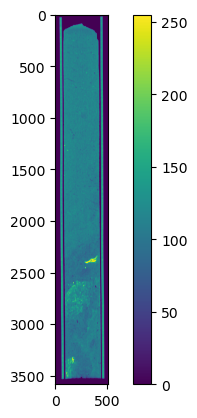

In [54]:
#Loading a JPG image (radiograph) and changing intensity

view_top =  '../data/raw/delgt01/ct_raw/DELGT01-C1-jpg/DELGT01-C1-1/DELGT01-C1-1.jpg'
view_axial = '../data/raw/delgt01/ct_raw/DELGT01-C1-jpg/DELGT01-C1-1/Reslice of DELGT01-C1-1.jpg'
im = iio.imread(view_axial)

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()
#format_and_render_plot()

In [67]:
im0 =  '../data/raw/delgt01/ct_raw/DELGT01-C1-raw/DELGT01-C1-1/DELGT01-C1.CT.PRIVATE_STANDAARD_(ADULT).0001.0512.2023.08.11.11.48.42.222746.67012604.IMA'
im = iio.imread(im0)

#print('Data type:', im0.dtype)
#print('Min. value:', im0.min())
#print('Max value:', im0.max())

#plt.imshow(im0)
#plt.colorbar()
#format_and_render_plot()

metadata = iio.immeta(im0)
#print(metadata["mode"])  # "RGB"

props = iio.improps(im0)
#print(props.shape)  # (300, 451, 3)
#print(props.dtype)  # dtype('uint8')
# Plot the grayscale image

Reading DICOM (examining files): 1/700 files (0.146/700 files (6.6%92/700 files (13.1138/700 files (19.7%181/700 files (25.9%226/700 files (32.3%276/700 files (39.4%322/700 files (46.0%369/700 files (52.7%413/700 files (59.0%455/700 files (65.0%499/700 files (71.3%544/700 files (77.7%585/700 files (83.6%630/700 files (90.0%678/700 files (96.9%700/700 files (100.0%)
  Found 1 correct series.


ValueError: DICOM plugin should know what to expect.

In [61]:
#reading metadata

metadata = iio.immeta(view_axial)
print(metadata["mode"])  # "RGB"

props = iio.improps(view_axial)
print(props.shape)  # (300, 451, 3)
print(props.dtype)  # dtype('uint8')
# Plot the grayscale image

L
(3584, 512)
uint8
